In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f1-dnf-classification/f1_dnf.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/kaggle/input/f1-dnf-classification/f1_dnf.csv")

In [3]:
print(df.shape)
print(df.info())
print(df.head)
print(df.tail)
print(df.describe())
print(df.isnull().sum())
print(df.duplicated().sum())

(10000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     8982 non-null   object 
 9   fastestLap       10000 non-null  object 
 10  rank             10000 non-null  object 
 11  fastestLapTime   10000 non-null  object 
 12  fastestLapSpeed  9047 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  n

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [4]:
df['fastestLapSpeed']=pd.to_numeric(df['fastestLapSpeed'],errors='coerce')
df['milliseconds']=pd.to_numeric(df['milliseconds'],errors='coerce')
df['points'] = df['points'].fillna(0)
mean_speed=df['fastestLapSpeed'].mean()
median_time=df['milliseconds'].median()
df['fastestLapSpeed']=df['fastestLapSpeed'].fillna(mean_speed)
df['milliseconds'] = df['milliseconds'].fillna(median_time)
df['laps'] = df['laps'].fillna(0)
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [5]:
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum()) 
df.columns

(10000, 31)
resultId           0
raceId             0
year               0
round              0
grid               0
positionOrder      0
points             0
laps               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
driverRef          0
surname            0
forename           0
dob                0
nationality_x      0
constructorRef     0
name               0
nationality_y      0
circuitRef         0
circuitId          0
name_y             0
location           0
country            0
lat                0
lng                0
alt                0
date               0
target_finish      0
dtype: int64
0


Index(['resultId', 'raceId', 'year', 'round', 'grid', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'driverRef', 'surname', 'forename',
       'dob', 'nationality_x', 'constructorRef', 'name', 'nationality_y',
       'circuitRef', 'circuitId', 'name_y', 'location', 'country', 'lat',
       'lng', 'alt', 'date', 'target_finish'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


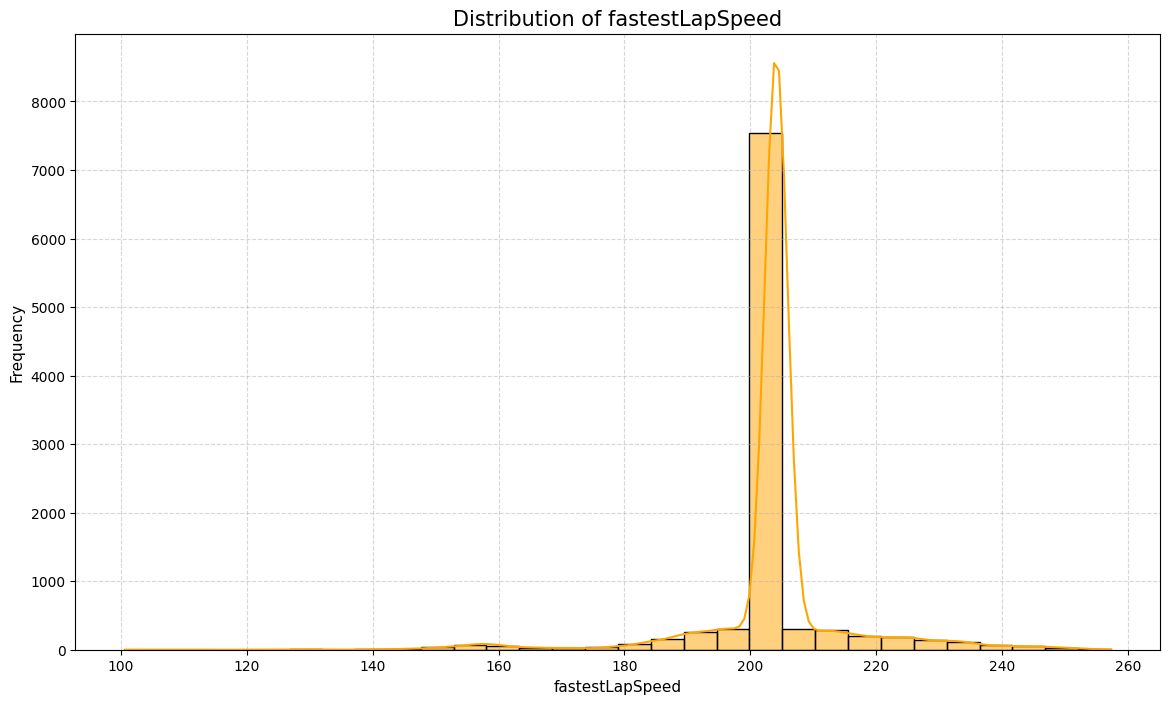

In [6]:
plt.figure(figsize=(14,8))
sns.histplot(df['fastestLapSpeed'], bins=30, kde=True, color='orange')
plt.title('Distribution of fastestLapSpeed', fontsize=15)
plt.xlabel('fastestLapSpeed', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

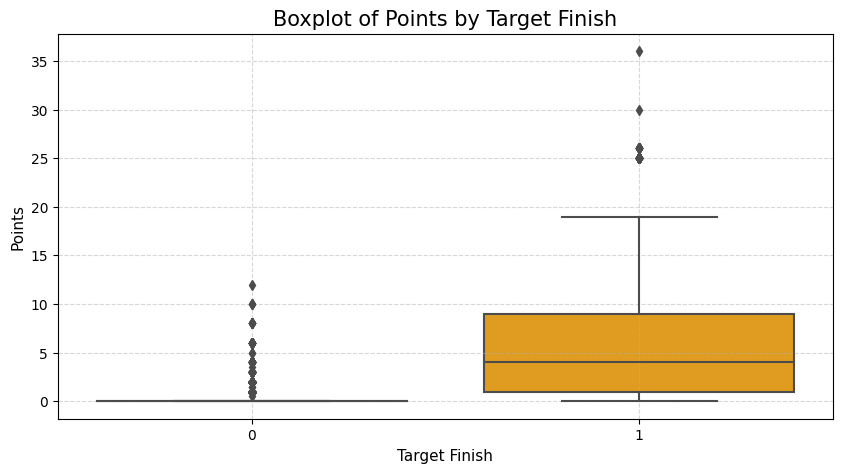

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target_finish', y='points', data=df, color='orange')
plt.title('Boxplot of Points by Target Finish', fontsize=15)
plt.xlabel('Target Finish', fontsize=11)
plt.ylabel('Points', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

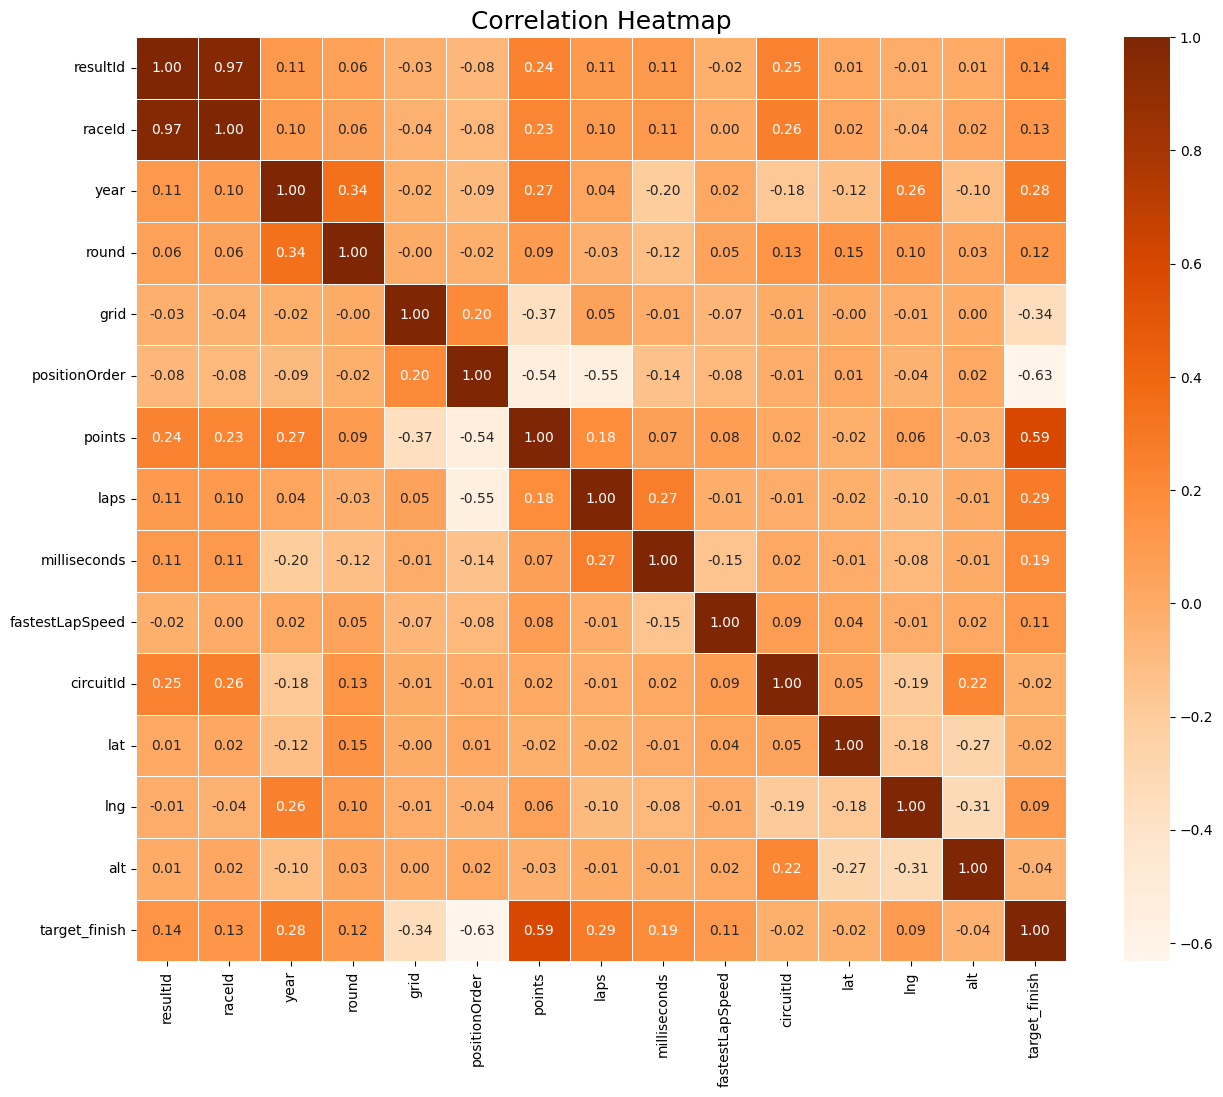

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

**Modeling**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [10]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))
X = df.drop('target_finish', axis=1)
y = df['target_finish']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [11]:
print(X_train)

      resultId  raceId  year  round  grid  positionOrder  points  laps  \
8369     23052     954  2016      7     5              4    12.0  70.0   
9722     11165     469  1982      3     5             24     0.0   5.0   
6950      5581     272  1994     16     0             27     0.0   0.0   
1919     25820    1095  2022     21    19             15     0.0  71.0   
5713      5866     283  1993     11     4             24     0.0  17.0   
...        ...     ...   ...    ...   ...            ...     ...   ...   
350       2914     157  2001     17     3              6     1.0  53.0   
79       19086     793  1955      2     3              9     0.0  81.0   
8039      5588     273  1993      1    15              6     1.0  69.0   
6936     26277    1120  2023     22    12             12     0.0  58.0   
5640      4554     231  1996      8    21             20     0.0   6.0   

      milliseconds  fastestLap  ...  nationality_y  circuitRef  circuitId  \
8369     5518316.0          43  ..

In [12]:
print(X_test)

      resultId  raceId  year  round  grid  positionOrder  points  laps  \
8018     13641     556  1977     14     0             25     0.0   0.0   
9225      4743     240  1995      1    26             23     0.0  12.0   
3854     22312     908  2014      9     5              7     6.0  52.0   
2029      8463     371  1989     16    22              9     0.0  42.0   
3539     11674     487  1981      5    18             10     0.0  53.0   
...        ...     ...   ...    ...   ...            ...     ...   ...   
6923      7492     334  1990     14     0             32     0.0   0.0   
1207     19977     830  1951      6    12             17     0.0  11.0   
7960      1859     107  2004     18     7              5     4.0   0.0   
2339     18751     777  1957      2     3             15     0.0   4.0   
6637      2052     116  2003      9     6             18     0.0  37.0   

      milliseconds  fastestLap  ...  nationality_y  circuitRef  circuitId  \
8018     5788651.0          79  ..

In [13]:
lr = LogisticRegression(max_iter=1000) 
lr.fit(X_train, y_train) 
y_pred_lr = lr.predict(X_test)

In [14]:
print("Logistic Regression results:") 
print("Overall Accuracy:", accuracy_score(y_test, y_pred_lr)) 
print("Precision:", precision_score(y_test, y_pred_lr)) 
print("Recal:", recall_score(y_test, y_pred_lr)) 
print("F1 Score:", f1_score(y_test, y_pred_lr))

Logistic Regression results:
Overall Accuracy: 0.731
Precision: 0.5310344827586206
Recal: 0.27697841726618705
F1 Score: 0.3640661938534278


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train) 
y_pred_rf = rf.predict(X_test)  
print("Random Forest Results:") 
print("Overall Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf)) 
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Results:
Overall Accuracy: 0.985
Precision: 0.9730215827338129
Recall: 0.9730215827338129
F1 Score: 0.9730215827338129


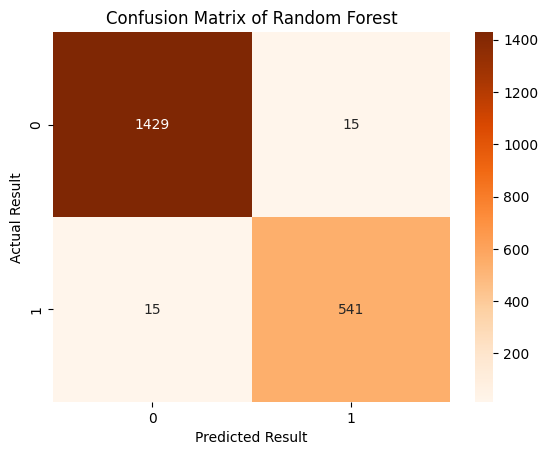

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.show()

In [17]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)]
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.731,0.531034,0.276978,0.364066
1,Random Forest,0.985,0.973022,0.973022,0.973022


I chose Random Forest because it can handle all the data easily and tells us which things matter most for predicting if a driver will finish the race